<a href="https://colab.research.google.com/github/Parthivvarma2004/FashionMNIST_Computer_vision/blob/main/FashionMNIST_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing dependencies
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Downloading training and testing data
train_data = datasets.FashionMNIST(root = 'data', train = True, download = True, transform = ToTensor())
test_data = datasets.FashionMNIST(root = 'data', train = False, download = True, transform = ToTensor())

In [3]:
#Checking if data has been downloaded in the correct way
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [5]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [6]:
train_data.targets[0]

tensor(9)

In [7]:
#Display all the different labels/class names
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

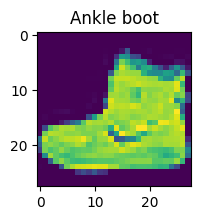

In [8]:
#Printing the image for data visualization
plt.figure(figsize=(2, 2))
plt.imshow(image.squeeze())
plt.title(class_names[label])

In [9]:
#Creating the dataloader
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = False)

In [10]:
len(train_dataloader)

1875

In [11]:
len(test_dataloader)

313

In [12]:
#Next we flatten our tensors as linear layers in the nn module work with single vectors
#First attempt at building a solution - linear and non linear layers (Relu())
from torch import nn
class ModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                      nn.Linear(in_features=input_shape, out_features = hidden_units),
                                      nn.ReLU(),
                                      nn.Linear(in_features = hidden_units, out_features = output_shape),
                                      nn.ReLU()
                                      )
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [13]:
#Next we define the gpu as device to make the process faster
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
#Flattening the model will cause the vector to be of size 28*28 = 784, so we use input_shape = 784, hidden_units = 10 (arbitrary small number),
#and output_units = len(class_names)

model_0  = ModelV0(input_shape = 784, hidden_units = 10, output_shape = len(class_names)).to(device)


In [15]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.0253, -0.0018, -0.0295,  ..., -0.0019, -0.0123,  0.0032],
        [-0.0205,  0.0154,  0.0095,  ...,  0.0071, -0.0073,  0.0188],
        [-0.0327,  0.0004,  0.0132,  ...,  0.0108,  0.0344,  0.0270],
        ...,
        [-0.0018, -0.0275,  0.0068,  ..., -0.0184,  0.0122, -0.0255],
        [-0.0199,  0.0008, -0.0046,  ..., -0.0214,  0.0260,  0.0276],
        [-0.0340, -0.0325, -0.0095,  ..., -0.0328, -0.0029,  0.0083]],
       device='cuda:0', requires_grad=True)

In [16]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [17]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [18]:
#Creating an accuracy function to use later
def accuracy_fn(y_true: torch.Tensor, y_pred: torch.Tensor):
  matches = torch.eq(y_true, y_pred).sum().item()
  return ((matches/len(y_pred))*100)

In [19]:
#Training and testing functions
def train_step(model: torch.nn.Module,
               dataLoader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  train_loss = 0
  train_acc = 0
  model.to(device)
  for batch, (X,y) in  enumerate(dataLoader):
    X = X.to(device)
    y = y.to(device)

    train_pred = model(X)

    loss = loss_fn(train_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y, y_pred = train_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(dataLoader)
  train_acc /= len(dataLoader)
  print(f"Train loss: {train_loss:.5f} , Train accuracy: {train_acc:.2f}%")

def test_step(dataLoader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X, y in dataLoader:
            X = X.to(device)
            y = y.to(device)

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(dataLoader)
        test_acc /= len(dataLoader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [20]:
from timeit import default_timer as timer
train_time_start = timer()

epochs = 5
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n")
  train_step(dataLoader = train_dataloader,
             model = model_0,
             optimizer = optimizer,
             loss_fn = loss_function,
             accuracy_fn = accuracy_fn)
  test_step(dataLoader=test_dataloader,
            model=model_0,
            loss_fn=loss_function,
            accuracy_fn=accuracy_fn
            )
  train_time_end = timer()
  print(f"It took {train_time_end - train_time_start} seconds to complete the process\n" )

Epoch: 0

Train loss: 1.28227 , Train accuracy: 60.67%
Test loss: 1.21748 | Test accuracy: 61.78%

It took 17.640845848000026 seconds to complete the process

Epoch: 1

Train loss: 1.18695 , Train accuracy: 63.88%
Test loss: 1.18732 | Test accuracy: 64.19%

It took 29.324207043000115 seconds to complete the process

Epoch: 2

Train loss: 1.17027 , Train accuracy: 64.19%
Test loss: 1.18434 | Test accuracy: 63.94%

It took 41.045114942000055 seconds to complete the process

Epoch: 3

Train loss: 1.16187 , Train accuracy: 64.48%
Test loss: 1.19459 | Test accuracy: 63.41%

It took 52.705046020999816 seconds to complete the process

Epoch: 4

Train loss: 1.15502 , Train accuracy: 64.58%
Test loss: 1.18497 | Test accuracy: 64.09%

It took 64.30329557000005 seconds to complete the process



In [21]:
#Model evaluation function
def model_eval(model: torch.nn.Module,
               dataLoader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  eval_acc = 0
  eval_loss = 0
  for X, y in dataLoader:
    X = X.to(device)
    y = y.to(device)

    y_pred = model(X)

    eval_loss += loss_fn(y_pred, y)
    eval_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

  eval_loss /= len(dataLoader)
  eval_acc /= len(dataLoader)
  return {"model_name": model.__class__.__name__,
          "loss": eval_loss.item(),
          "accuracy": eval_acc}


In [22]:
model0_results = model_eval(model = model_0,
               dataLoader = test_dataloader,
               loss_fn = loss_function,
               accuracy_fn = accuracy_fn,
               device = device)
model0_results

{'model_name': 'ModelV0',
 'loss': 1.1849697828292847,
 'accuracy': 64.08746006389777}

In [23]:
#Creating a model with CNNs
class ModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  padding = 1,
                  stride = 1),

        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  padding = 1,
                  stride = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
        )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  padding = 1,
                  stride = 1),

        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  padding = 1,
                  stride = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = output_shape)
    )

  def forward(self, x:torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x
model_1 = ModelV1(1, 10 , len(class_names))
model_1

ModelV1(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [24]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                             lr=0.1)

In [25]:
#Training and testing the model
train_time_start = timer()

epochs = 5
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n")
  train_step(dataLoader = train_dataloader,
             model = model_1,
             optimizer = optimizer,
             loss_fn = loss_function,
             accuracy_fn = accuracy_fn)
  test_step(dataLoader=test_dataloader,
            model=model_1,
            loss_fn=loss_function,
            accuracy_fn=accuracy_fn
            )
  train_time_end = timer()
  print(f"It took {train_time_end - train_time_start} seconds to complete the process\n" )

Epoch: 0

Train loss: 0.58099 , Train accuracy: 78.65%
Test loss: 0.43817 | Test accuracy: 83.87%

It took 14.745510803999878 seconds to complete the process

Epoch: 1

Train loss: 0.36322 , Train accuracy: 86.62%
Test loss: 0.36980 | Test accuracy: 86.71%

It took 29.577794291999908 seconds to complete the process

Epoch: 2

Train loss: 0.32249 , Train accuracy: 88.25%
Test loss: 0.33857 | Test accuracy: 87.84%

It took 43.310602022999774 seconds to complete the process

Epoch: 3

Train loss: 0.30079 , Train accuracy: 89.03%
Test loss: 0.31904 | Test accuracy: 88.53%

It took 57.57835947299964 seconds to complete the process

Epoch: 4

Train loss: 0.28605 , Train accuracy: 89.64%
Test loss: 0.30269 | Test accuracy: 88.99%

It took 71.85982466699988 seconds to complete the process



In [26]:
model1_results = model_eval(model = model_1,
               dataLoader = test_dataloader,
               loss_fn = loss_function,
               accuracy_fn = accuracy_fn,
               device = device)
model1_results

{'model_name': 'ModelV1',
 'loss': 0.3026914596557617,
 'accuracy': 88.9876198083067}

In [27]:
results_comparison = pd.DataFrame([model0_results, model1_results])
results_comparison

,model_name,loss,accuracy
0,ModelV0,1.184970,64.08746
1,ModelV1,0.302691,88.98762


In [28]:
#Saving the best model
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                       exist_ok = True)

MODEL_NAME = "FashionMNIST_CNN_model.pth"
SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(obj = model_1.state_dict(),
           f = SAVE_PATH)
SAVE_PATH

PosixPath('models/FashionMNIST_CNN_model.pth')

In [29]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [30]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0]

tensor([[[0.0000, 0.0000, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.1137, 0.5647, 0.3922, 0.2941, 0.2392, 0.1569, 0.1451,
          0.2000, 0.2471, 0.5961, 0.6196, 0.0353, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000, 0.2824,
          0.7137, 0.8078, 0.8157, 0.7451, 0.7333, 0.7608, 0.7373, 0.7451,
          0.8118, 0.8863, 0.8431, 0.7765, 0.9294, 0.6157, 0.0745, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.6627, 0.8392,
          0.8078, 0.7686, 0.7961, 0.7882, 0.6588, 0.5255, 0.4941, 0.4902,
          0.6863, 0.7608, 0.7569, 0.7765, 0.7922, 0.8196, 0.8196, 0.3176,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.6784, 0.8510, 0.7451,
          0.7451, 0.7569, 0.7176, 0.7333, 0.8118, 0.7961, 0.8471, 0.7922,
          0.8118, 0.7608, 0.7765, 0.7529, 0.7176, 0.7176,

In [31]:
test_labels[0]

4

In [32]:
pred_probs = make_predictions(model = model_1,
                              data = test_samples)

pred_probs[0]

tensor([3.1143e-03, 4.1899e-04, 1.8888e-01, 5.2996e-05, 6.7441e-01, 4.1456e-05,
        1.3148e-01, 4.5223e-05, 1.3585e-03, 1.9063e-04])

In [33]:
pred_classes = pred_probs.argmax(dim = 1)
pred_classes[0]

tensor(4)

In [34]:
test_labels, pred_classes

([4, 3, 0, 5, 9, 1, 3, 7, 4], tensor([4, 3, 0, 5, 9, 1, 3, 7, 4]))

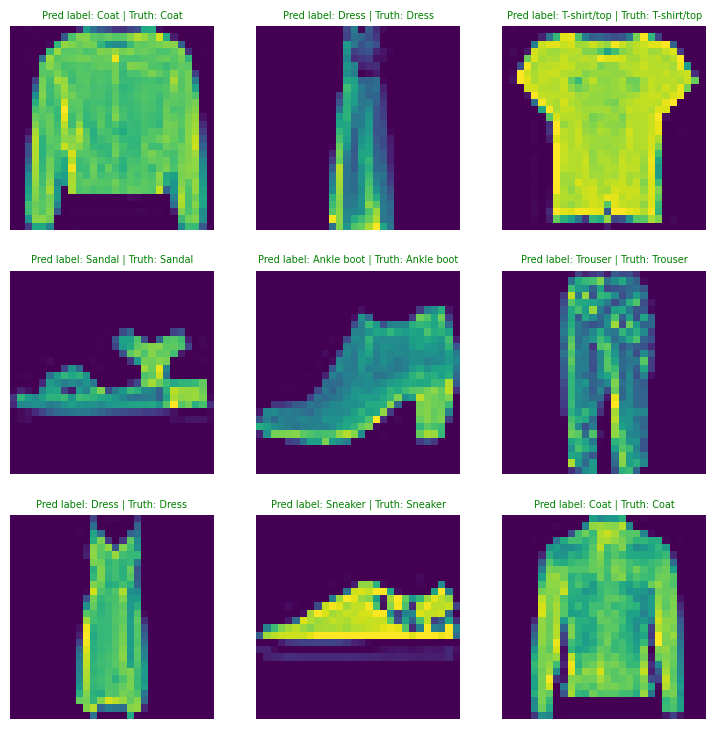

In [35]:
#Plotting predictions for comparison
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze())
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred label: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize = 7, c = 'g')
  else:
    plt.title(title_text, fontsize = 7, c = 'r')
  plt.axis(False)

In [38]:
#Importing dependencies for a confusion matrix
try:
  import torchmetrics
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics

from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

import mlxtend
print(mlxtend.__version__)
print(torchmetrics.__version__)

0.22.0
1.0.0


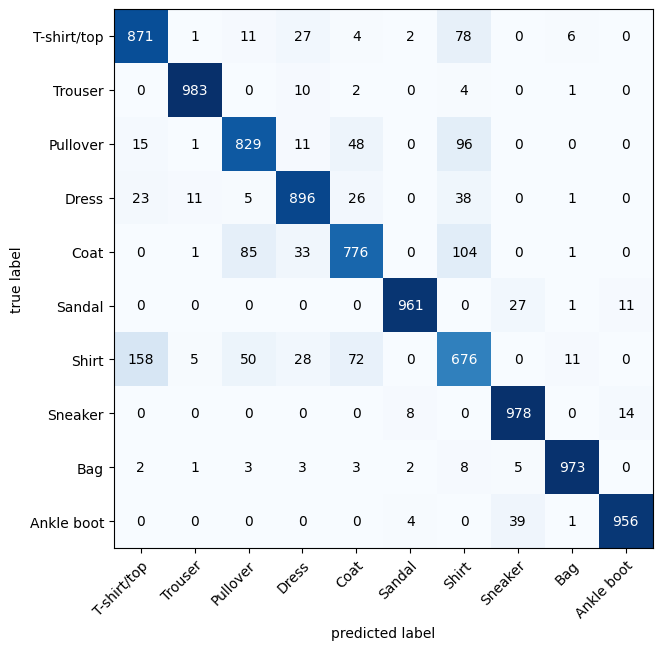

In [41]:
#Making predictions with the model
y_preds = []
model_1.eval()
with torch.inference_mode():
  for X,y in test_dataloader:

    X, y = X.to(device), y.to(device)
    y_logit = model_1(X)
    y_pred = torch.softmax(y_logit, dim = 1).argmax(dim = 1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
confusion_matrix = ConfusionMatrix(num_classes = len(class_names), task = 'multiclass')
confusion_matrix_tensor = confusion_matrix(preds = y_pred_tensor,
                                           target = test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confusion_matrix_tensor.numpy(),
    class_names = class_names,
    figsize = (10,7)
)